# **Warm up coding**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# create an empty image
img = tf.zeros([1, 3, 3, 3])
# draw a box around the image
box = np.array([0, 0, 1, 1])
boxes = box.reshape([1, 1, 4])
# alternate between red and blue
colors = np.array([[1.0, 0.0, 0.0], [0.0, 0.0, 1.0]])
image_wiht_box = tf.image.draw_bounding_boxes(img, boxes, colors)
image_wiht_box 

<tf.Tensor: shape=(1, 3, 3, 3), dtype=float32, numpy=
array([[[[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [0., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]]]], dtype=float32)>

In [110]:
#Create a function which returns the length of a string, WITHOUT using String.length property.
def length(s): 
  print(len([x for x in s]))

length('Hello World')
length('Edabit')
length('wash your hands!')

11
6
16


In [111]:
def length(s):
  print(s.count('Hello'))
 
length('Hello World')
length('Edabit')
length('wash your hands!')

1
0
0


In [112]:
import re

def length(s):
  print(len(re.findall('l', s)))

length('Hello World')
length('Edabit')
length('wash your hands!')

3
0
0


In [113]:
def length(s):
  print(len([x for x in s if x == 'o']))

length('Hello World')
length('Edabit')
length('wash your hands!')

2
0
1


In [ ]:
img_tf = tf.Variable(img)
print(img_tf.get_shape().as_list())

[1, 3, 3, 3]


In [115]:
# True, False or error?
a = {1,2,3}
b = {1,2,3,3,1,3,2}
print(a==b)
print(type(a))
print(type(b))

True
<class 'set'>
<class 'set'>


## **Simple Guide to Hyperparameter Tuning in Neural Networks**

# **1. Prepare setup**


**a. Import libraries**

In [79]:

import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import utils
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2

from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses
from sklearn.utils import shuffle
import numpy as np

print(tf.version)
print(tf.keras.__version__)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>
2.7.0


# **2. Import dataset**

In [80]:
mnist = keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [81]:
import matplotlib.pyplot as plt

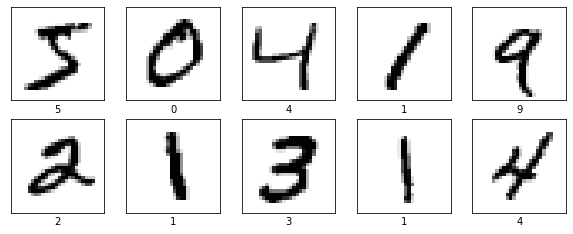

In [82]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [83]:
print(f'We have {x_train.shape[0]} train samples')
print(f'We have {x_test.shape[0]} test samples')

We have 60000 train samples
We have 10000 test samples


In [84]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [85]:
print(x_train[0]) #Five 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# **3. Preprocess data**

**a. Normalize and flatten picture data**

We need to make the 2D image arrays into 1D (flatten them). We can either perform this by using array reshaping with:
- numpy.reshape() 
- or the keras' method for this: a layer called keras.layers.Flatte

In [86]:
# normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# reshape the data into 1D vectors
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

num_classes = 10

# Check the column length
x_train.shape[1]

784

In [87]:
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**b. One-hot encode data**

We want the neural network to classify our data into 10 possible categories. Therfore we have to one-hot encode the y_train and y_test labels into a binary code. 

**Why is a one-hot encoding required?**

Some algorithms can work with categorical data directly. For example, a decision tree can be learned directly from categorical data with no data transformation required (this depends on the specific implementation).

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

In general, this is mostly a constraint of the efficient implementation of machine learning algorithms rather than hard limitations on the algorithms themselves.

This means that categorical data must be converted to a numerical form. If the categorical variable is an output variable, you may also want to convert predictions by the model back into a categorical form in order to present them or use them in some application.

In [88]:
# Convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [89]:
print(y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# **4. Create Neural Network**

One of the most common optimization algorithms is Stochastic Gradient Descent (SGD). 
The hyperparameters that can be optimized in SGD are learning rate, momentum, decay and nesterov.

- **Learning rate:** controls the weight at the end of each batch, and momentum controls how much to let the previous update influence the current weight update. 

- **Decay:** indicates the learning rate decay over each update (GER: Abnahme der Lernrate bei jedem Update)

- **Nesterov:** takes the value “True” or “False” depending on if we want to apply Nesterov momentum.

Typical values: for those hyperparameters are
- lr=0.01, 
- decay=1e-6
- momentum=0.9
- nesterov=True

**Process:** The learning rate hyperparameter goes into the optimizer function which we will see below. Keras has a default learning rate scheduler in the SGDoptimizer that decreases the learning rate during the stochastic gradient descent optimization algorithm. The learning rate is decreased according to this formula:
lr=lr×1/(1+decay∗epoch)

**a. Define hyperparameter for optimizer**

In [ ]:
#Define Hyperparameter
epochs=60
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

#Instanciate optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

**b. Build neural network architecture**

In [ ]:
# build the model
input_dim = x_train.shape[1]

model = Sequential()
model.add(Dense(64, activation='relu', kernel_initializer='uniform', input_dim=input_dim)) 
model.add(Dropout(0.1))
model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
model.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['acc']
)

We can now run the model and see how well it performs. 

This took around 20 minutes on my machine and may be faster or slower on yours depending on your machine.

**c. Train model**

In [ ]:
%%time
# Fit the model
batch_size = int(input_dim/100)

lr_model_history =  model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/60
8572/8572 [==============================] - 22s 2ms/step - loss: 0.3388 - acc: 0.9020 - val_loss: 0.1907 - val_acc: 0.9534
Epoch 2/60
8572/8572 [==============================] - 22s 3ms/step - loss: 0.2173 - acc: 0.9474 - val_loss: 0.1665 - val_acc: 0.9616
Epoch 3/60
8572/8572 [==============================] - 28s 3ms/step - loss: 0.2107 - acc: 0.9552 - val_loss: 0.1794 - val_acc: 0.9613
Epoch 4/60
8572/8572 [==============================] - 21s 2ms/step - loss: 0.2036 - acc: 0.9600 - val_loss: 0.1974 - val_acc: 0.9639
Epoch 5/60
8572/8572 [==============================] - 24s 3ms/step - loss: 0.2024 - acc: 0.9621 - val_loss: 0.2187 - val_acc: 0.9649
Epoch 6/60
8572/8572 [==============================] - 21s 2ms/step - loss: 0.2051 - acc: 0.9632 - val_loss: 0.1745 - val_acc: 0.9689
Epoch 7/60
8572/8572 [==============================] - 21s 2ms/step - loss: 0.2061 - acc: 0.9646 - val_loss: 0.1952 - val_acc: 0.9687
Epoch 8/60
8572/8572 [==============================] -

# **5. Evaluate performance**

Plot the accuracy and loss function as a function of epochs for the training and test sets to see how the network performed.

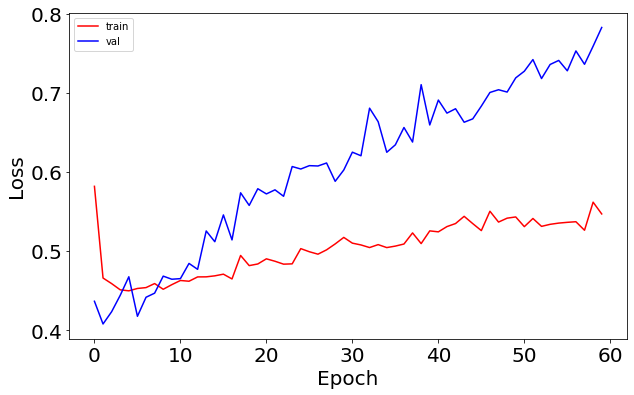

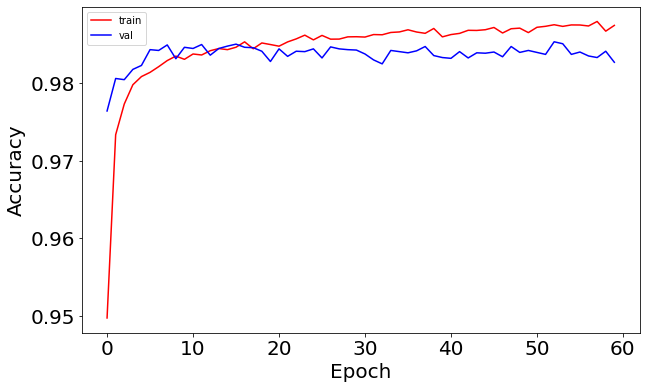

In [ ]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['acc']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_acc']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# **6. Adjusting learning rate**

**a. Apply a custom learning rate change using LearningRateScheduler**

In [ ]:

# solution
epochs = 60
learning_rate = 0.1 # initial learning rate
decay_rate = 0.1
momentum = 0.8

# define the optimizer function
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

input_dim = x_train.shape[1]
num_classes = 10
batch_size = 196

# build the model
exponential_decay_model = Sequential()
exponential_decay_model.add(Dense(64, activation='relu', kernel_initializer='uniform', input_dim = input_dim))
exponential_decay_model.add(Dropout(0.1))
exponential_decay_model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
exponential_decay_model.add(Dense(num_classes, kernel_initializer='uniform', activation=tf.nn.softmax))

# compile the model
exponential_decay_model.compile(loss='categorical_crossentropy', 
                                optimizer=sgd, 
                                metrics=['acc'])
                                
# define the learning rate change 
def exp_decay(epoch):
    lrate = learning_rate * np.exp(-decay_rate*epoch)
    return lrate
    
# learning schedule callback
loss_history = History()
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list = [loss_history, lr_rate]

# you invoke the LearningRateScheduler during the .fit() phase
exponential_decay_model_history = exponential_decay_model.fit(x_train, y_train,
                                    batch_size=batch_size,
                                    epochs=epochs,
                                    callbacks=callbacks_list,
                                    verbose=1,
                                    validation_data=(x_test, y_test))

Epoch 1/60
307/307 [==============================] - 2s 6ms/step - loss: 2.0662 - acc: 0.3738 - val_loss: 1.6412 - val_acc: 0.5311 - lr: 0.1000
Epoch 2/60
307/307 [==============================] - 2s 5ms/step - loss: 1.3473 - acc: 0.6309 - val_loss: 1.0719 - val_acc: 0.7146 - lr: 0.0905
Epoch 3/60
307/307 [==============================] - 1s 5ms/step - loss: 1.0106 - acc: 0.7005 - val_loss: 0.8832 - val_acc: 0.7453 - lr: 0.0819
Epoch 4/60
307/307 [==============================] - 2s 7ms/step - loss: 0.8960 - acc: 0.7246 - val_loss: 0.8066 - val_acc: 0.7637 - lr: 0.0741
Epoch 5/60
307/307 [==============================] - 2s 5ms/step - loss: 0.8430 - acc: 0.7379 - val_loss: 0.7652 - val_acc: 0.7723 - lr: 0.0670
Epoch 6/60
307/307 [==============================] - 1s 5ms/step - loss: 0.8103 - acc: 0.7467 - val_loss: 0.7381 - val_acc: 0.7834 - lr: 0.0607
Epoch 7/60
307/307 [==============================] - 2s 5ms/step - loss: 0.7872 - acc: 0.7534 - val_loss: 0.7193 - val_acc: 0.787

**b. Evaluate the performance**

Plot the learning rate and loss functions as functions of the number of epochs

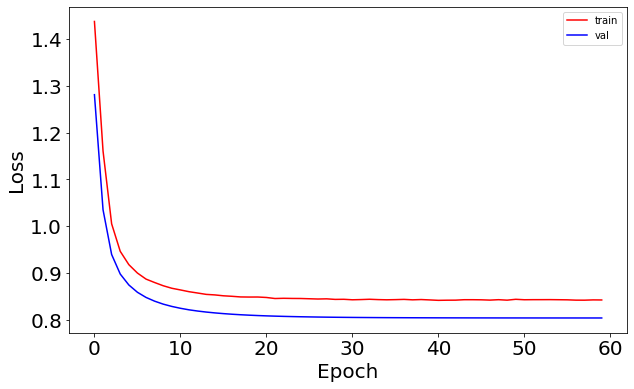

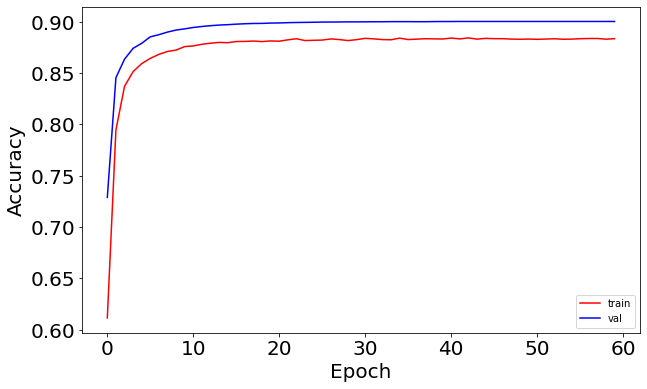

In [ ]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(exponential_decay_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(exponential_decay_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(exponential_decay_model_history.history['acc']), 'r', label='train')
ax.plot(np.sqrt(exponential_decay_model_history.history['val_acc']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

**C. Result**

The learning rate plot is incredibly smooth as it follows our predefined exponentially decaying function.

This shows you that developing a learning rate scheduler can be a helpful way to improve neural network performance.

# **7. Adjust optimizer and a loss function**



When constructing a model and using it to make our predictions, for example, to assign label scores to images (“cat”, “plane”, etc), we want to measure our success or failure by defining a “loss” function (or objective function). 

The goal of optimization is to efficiently calculate the parameters/weights that minimize this loss function. keras provides various types of loss functions.

Sometimes the “loss” function measures the “distance”. We can define this “distance” between two data points in various ways suitable to the problem or dataset. The distance used depends on the data type and the specific problem that is being tackled. For example, in natural language processing (which analyses textual data), the Hamming distance is much more common to use.

**Distance**
- Euclidean
- Manhattan
- Hamming (for NLP. Measures distances between strings, for example. The Hamming distance of “carolin” and “cathrin” is 3.)

**Loss functions**
- MSE (for regression)
- categorical cross-entropy (for multiclass classification)
- binary cross entropy (for binary classification)

**a. Test different optimizer - RMSprop**

In [92]:
# build the model
input_dim = x_train.shape[1]

model = Sequential()
model.add(Dense(64, activation='relu', kernel_initializer='uniform', 
                input_dim = input_dim)) # fully-connected layer with 64 hidden units
model.add(Dropout(0.1))
model.add(Dense(64, kernel_initializer='uniform', activation=tf.nn.relu))
model.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))

# defining the parameters for RMSprop (I used the keras defaults here)
rms = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=None, decay=0.0)

model.compile(loss='categorical_crossentropy',
              optimizer=rms,
              metrics=['acc'])

**b. Train model**

In [ ]:
%%time
# Fit the model
batch_size = int(input_dim/100)

rms_model_history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/60
8572/8572 [==============================] - 17s 2ms/step - loss: 0.3364 - acc: 0.8979 - val_loss: 0.1543 - val_acc: 0.9531
Epoch 2/60
8572/8572 [==============================] - 18s 2ms/step - loss: 0.1682 - acc: 0.9488 - val_loss: 0.1339 - val_acc: 0.9592
Epoch 3/60
8572/8572 [==============================] - 18s 2ms/step - loss: 0.1488 - acc: 0.9536 - val_loss: 0.1270 - val_acc: 0.9607
Epoch 4/60
8572/8572 [==============================] - 16s 2ms/step - loss: 0.1363 - acc: 0.9584 - val_loss: 0.1215 - val_acc: 0.9625
Epoch 5/60
8572/8572 [==============================] - 18s 2ms/step - loss: 0.1293 - acc: 0.9599 - val_loss: 0.1201 - val_acc: 0.9622
Epoch 6/60
8572/8572 [==============================] - 17s 2ms/step - loss: 0.1241 - acc: 0.9613 - val_loss: 0.1183 - val_acc: 0.9627
Epoch 7/60
8572/8572 [==============================] - 16s 2ms/step - loss: 0.1207 - acc: 0.9624 - val_loss: 0.1133 - val_acc: 0.9645
Epoch 8/60
8572/8572 [==============================] -

**c. Evalute performance**

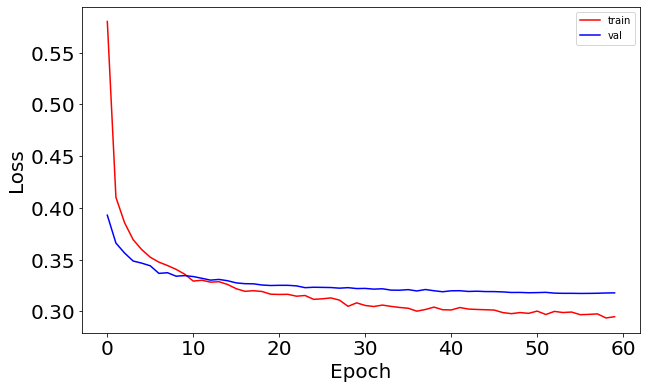

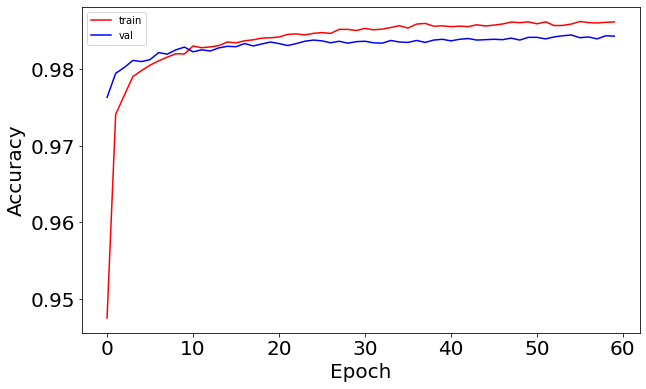

In [ ]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(rms_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(rms_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(rms_model_history.history['acc']), 'r', label='train')
ax.plot(np.sqrt(rms_model_history.history['val_acc']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# **8. Adjust batch size and number of epochs**

The batch size defines the number of samples that will be propagated through the network.

For instance, let’s say you have 1000 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. We can keep doing this procedure until we have propagated all samples through the network.

**Advantages of using a batch size < number of all samples:**

It requires less memory. Since you train the network using fewer samples, the overall training procedure requires less memory. That’s especially important if you are not able to fit the whole dataset in your machine’s memory.
Typically networks train faster with mini-batches. That’s because we update the weights after each propagation.

**Disadvantages of using a batch size < number of all samples:**

The smaller the batch the less accurate the estimate of the gradient will be.
The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work trough the entire training dataset.
One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches. There are no hard and fast rules for selecting batch sizes or the number of epochs, and there is no guarantee that increasing the number of epochs provides a better result than a lesser number.

In [ ]:
%%time
batch_size = input_dim
epochs = 60

model_history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/60
77/77 [==============================] - 1s 11ms/step - loss: 0.0868 - acc: 0.9732 - val_loss: 0.1010 - val_acc: 0.9687
Epoch 2/60
77/77 [==============================] - 1s 11ms/step - loss: 0.0882 - acc: 0.9728 - val_loss: 0.1010 - val_acc: 0.9687
Epoch 3/60
77/77 [==============================] - 1s 11ms/step - loss: 0.0856 - acc: 0.9732 - val_loss: 0.1010 - val_acc: 0.9687
Epoch 4/60
77/77 [==============================] - 1s 11ms/step - loss: 0.0858 - acc: 0.9729 - val_loss: 0.1009 - val_acc: 0.9686
Epoch 5/60
77/77 [==============================] - 1s 11ms/step - loss: 0.0863 - acc: 0.9726 - val_loss: 0.1009 - val_acc: 0.9686
Epoch 6/60
77/77 [==============================] - 1s 11ms/step - loss: 0.0853 - acc: 0.9732 - val_loss: 0.1009 - val_acc: 0.9686
Epoch 7/60
77/77 [==============================] - 1s 11ms/step - loss: 0.0859 - acc: 0.9730 - val_loss: 0.1009 - val_acc: 0.9686
Epoch 8/60
77/77 [==============================] - 1s 11ms/step - loss: 0.0876 - a

Test loss: 0.10064812004566193
Test accuracy: 0.9685999751091003


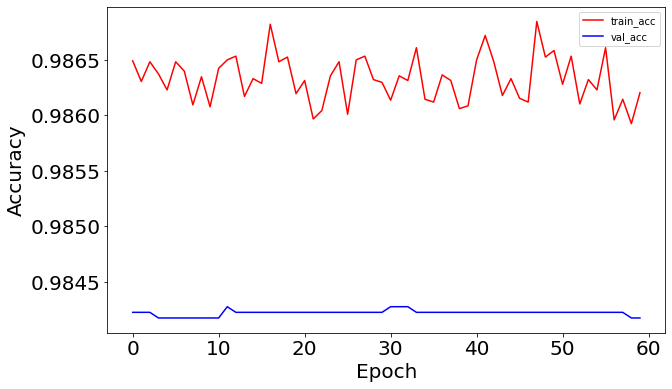

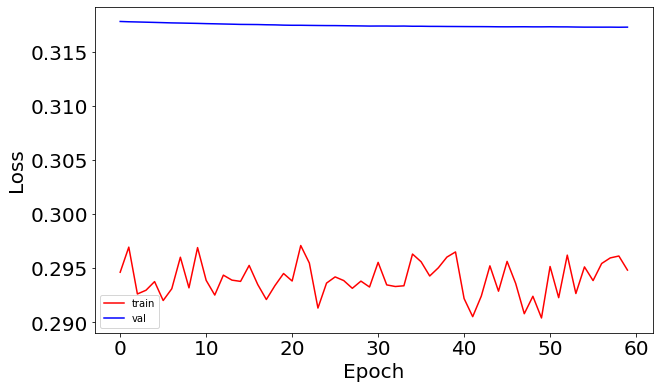

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['acc']), 'r', label='train_acc')
ax.plot(np.sqrt(model_history.history['val_acc']), 'b' ,label='val_acc')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# **9. Random restarts**

This method does not seem to have an implementation in keras. It can be done easily by altering keras.callbacks.LearningRateScheduler. I will leave this as an exercise for the reader, but it essentially involves resetting the learning rate after a specified number of epochs for a finite number of times.

# **10. Tuning Hyperparameters using cross-validation**


Now instead of trying different values by hand, we will use GridSearchCV from Scikit-Learn to try out several values for our hyperparameters and compare the results.

To do cross-validation with keras we will use the wrappers for the Scikit-Learn API. They provide a way to use Sequential Keras models (single-input only) as part of your Scikit-Learn workflow.

There are two wrappers available:
- keras.wrappers.scikit_learn.KerasClassifier(build_fn=None, **sk_params), which implements the Scikit-Learn classifier interface,
- keras.wrappers.scikit_learn.KerasRegressor(build_fn=None, **sk_params), which implements the Scikit-Learn regressor interface.

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

**a. Try different weight initializations**

The first hyperparameter we will try to optimize via cross-validation is different weight initializations.

In [93]:
# let's create a function that creates the model (required for KerasClassifier) 
# while accepting the hyperparameters we want to tune 
# we also pass some default values such as optimizer='rmsprop'

def create_model(init_mode='uniform'):
    
    # define model
    model = Sequential()
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu, input_dim=784)) 
    model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu))
    model.add(Dense(10, kernel_initializer=init_mode, activation=tf.nn.softmax))
    
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=rms,
              metrics=['accuracy'])
    
    return model

In [106]:
%%time
seed = 7
numpy.random.seed(seed)
batch_size = 128
epochs = 10

model_CV = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, epochs=epochs, 
                           batch_size=batch_size, verbose=1)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  import sys
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3934 - accuracy: 0.8881
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1868 - accuracy: 0.9451
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1413 - accuracy: 0.9582
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1177 - accuracy: 0.9650
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1029 - accuracy: 0.9689
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0928 - accuracy: 0.9722
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0845 - accuracy: 0.9744
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0785 - accuracy: 0.9760
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0733 - accuracy: 0.9773
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0675 - accuracy: 0.9789

In [107]:
# print results
print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9694166779518127 using {'init_mode': 'glorot_uniform'}
 mean=0.9659, std=0.001158 using {'init_mode': 'uniform'}
 mean=0.9669, std=0.00138 using {'init_mode': 'lecun_uniform'}
 mean=0.9659, std=0.001731 using {'init_mode': 'normal'}
 mean=0.1124, std=0.002416 using {'init_mode': 'zero'}
 mean=0.9668, std=0.0009681 using {'init_mode': 'glorot_normal'}
 mean=0.9694, std=0.001185 using {'init_mode': 'glorot_uniform'}
 mean=0.9673, std=0.001432 using {'init_mode': 'he_normal'}
 mean=0.9686, std=0.001564 using {'init_mode': 'he_uniform'}


**b. Analyze results**

We see that the best results are obtained either from the model using lecun_uniform initialization or glorot_uniform initialization and that we can achieve close to 97% accuracy with our network.

**c. Save best neural network model as JSON**

The Hierarchical Data Format (HDF5) is a data storage format for storing large arrays of data including values for the weights in a neural network.
You can install HDF5 Python module: pip install h5py
Keras gives you the ability to describe and save any model using the JSON format.

In [98]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)

# save weights to HDF5
model.save_weights("model.h5")
print("Model saved")

# when you want to retrieve the model: load json and create model
json_file = open('model.json', 'r')
saved_model = json_file.read()
# close the file as good practice
json_file.close()
model_from_json = model_from_json(saved_model)
# load weights into new model
model_from_json.load_weights("model.h5")
print("Model loaded")

Model saved
Model loaded


# **11. Cross-validate with more than one hyperparameter**

Usually, we are not interested in looking at how just one parameter changes, but how multiple parameter changes can affect our results. We can do cross-validation with more than one parameters simultaneously, effectively trying out combinations of them.

Note: Cross-validation in neural networks is computationally expensive. Think before you experiment! Multiply the number of features you are validating on to see how many combinations there are. Each combination is evaluated using the k-fold cross-validation (k is a parameter we choose).

For example, we can choose to search for different values of:
- batch size
- number of epochs
- initialization mode

The choices are specified into a dictionary and passed to GridSearchCV.

We will now perform a GridSearch for batch size, number of epochs and initializer combined.

In [99]:
# repeat some of the initial values here so we make sure they were not changed
input_dim = x_train.shape[1]
num_classes = 10

# let's create a function that creates the model (required for KerasClassifier) 
# while accepting the hyperparameters we want to tune 
# we also pass some default values such as optimizer='rmsprop'
def create_model_2(optimizer='rmsprop', init='glorot_uniform'):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, kernel_initializer=init, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer=init, activation=tf.nn.relu))
    model.add(Dense(num_classes, kernel_initializer=init, activation=tf.nn.softmax))

    # compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])

    return model

In [102]:

%%time
# fix random seed for reproducibility (this might work or might not work 
# depending on each library's implenentation)
seed = 7
numpy.random.seed(seed)

# create the sklearn model for the network
model_init_batch_epoch_CV = KerasClassifier(build_fn=create_model_2, verbose=1)

# we choose the initializers that came at the top in our previous cross-validation!!
init_mode = ['glorot_uniform', 'uniform', 'he_normal'] 
batches = [128, 512]
epochs = [10, 20]

# grid search for initializer, batch size and number of epochs
param_grid = dict(epochs=epochs, batch_size=batches, init=init_mode)
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, 
                    param_grid=param_grid,
                    cv=3)
grid_result = grid.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  import sys


Epoch 1/10
313/313 [==============================] - 2s 4ms/step - loss: 0.4818 - accuracy: 0.8649
Epoch 2/10
313/313 [==============================] - 1s 4ms/step - loss: 0.2279 - accuracy: 0.9320
Epoch 3/10
313/313 [==============================] - 1s 4ms/step - loss: 0.1733 - accuracy: 0.9478
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1420 - accuracy: 0.9577
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 0.1223 - accuracy: 0.9635
Epoch 6/10
313/313 [==============================] - 1s 4ms/step - loss: 0.1101 - accuracy: 0.9671
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0970 - accuracy: 0.9708
Epoch 8/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0900 - accuracy: 0.9726
Epoch 9/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0826 - accuracy: 0.9747
Epoch 10/10
157/157 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9705

In [103]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9714 using {'batch_size': 128, 'epochs': 20, 'init': 'glorot_uniform'}
mean=0.9688, std=0.001547 using {'batch_size': 128, 'epochs': 10, 'init': 'glorot_uniform'}
mean=0.9649, std=0.0008219 using {'batch_size': 128, 'epochs': 10, 'init': 'uniform'}
mean=0.9679, std=0.001041 using {'batch_size': 128, 'epochs': 10, 'init': 'he_normal'}
mean=0.9714, std=0.0007134 using {'batch_size': 128, 'epochs': 20, 'init': 'glorot_uniform'}
mean=0.9689, std=0.001343 using {'batch_size': 128, 'epochs': 20, 'init': 'uniform'}
mean=0.9707, std=0.0009186 using {'batch_size': 128, 'epochs': 20, 'init': 'he_normal'}
mean=0.9596, std=0.003598 using {'batch_size': 512, 'epochs': 10, 'init': 'glorot_uniform'}
mean=0.9504, std=0.004183 using {'batch_size': 512, 'epochs': 10, 'init': 'uniform'}
mean=0.9593, std=0.003942 using {'batch_size': 512, 'epochs': 10, 'init': 'he_normal'}
mean=0.967, std=0.001478 using {'batch_size': 512, 'epochs': 20, 'init': 'glorot_uniform'}
mean=0.9652, std=0.0023


One last question before we end: what do we do if the number of parameters and the number of values we have to cycle through in our GridSearchCV is particularly large?

This can be a particularly trouble some problem — imagine a situation where there are 5 parameters being selected for and 10 potential values that we have selected for each parameter. The number of unique combinations of this is 10⁵, which means we would have to train a ridiculously large number of networks. Clearly, it would be insanity to actually do it this way, so it is common to use RandomizedCV as an alternative.

**RandomizedCV**

RandomizedCV allows us to specify all of our potential parameters, and then for each fold in the cross-validation, it selects a random subset of parameters to use for the current model. In the end, the user can select the optimal set of parameters and use these as an approximate solution.